In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [5]:
from sklearn.metrics import accuracy_score

In [6]:
df=pd.read_csv(r"C:\Users\HP\Desktop\DS\Machine Learning\Data Sets\banana_quality.csv")

In [7]:
df.shape

(8000, 8)

In [8]:
df.head()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
0,-1.924968,0.468078,3.077832,-1.472177,0.294799,2.435570,0.271290,Good
1,-2.409751,0.486870,0.346921,-2.495099,-0.892213,2.067549,0.307325,Good
2,-0.357607,1.483176,1.568452,-2.645145,-0.647267,3.090643,1.427322,Good
3,-0.868524,1.566201,1.889605,-1.273761,-1.006278,1.873001,0.477862,Good
4,0.651825,1.319199,-0.022459,-1.209709,-1.430692,1.078345,2.812442,Good


In [9]:
df.tail()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity,Quality
7995,-6.414403,0.723565,1.134953,2.952763,0.297928,-0.156946,2.398091,Bad
7996,0.851143,-2.217875,-2.812175,0.489249,-1.323410,-2.316883,2.113136,Bad
7997,1.422722,-1.907665,-2.532364,0.964976,-0.562375,-1.834765,0.697361,Bad
7998,-2.131904,-2.742600,-1.008029,2.126946,-0.802632,-3.580266,0.423569,Bad
7999,-2.660879,-2.044666,0.159026,1.499706,-1.581856,-1.605859,1.435644,Bad


In [10]:
df.isnull().sum()

Size           0
Weight         0
Sweetness      0
Softness       0
HarvestTime    0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

In [11]:
df.describe()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,-0.747802,-0.761019,-0.770224,-0.014441,-0.751288,0.781098,0.008725
std,2.136023,2.015934,1.948455,2.065216,1.996661,2.114289,2.293467
min,-7.998074,-8.283002,-6.434022,-6.959320,-7.570008,-7.423155,-8.226977
25%,-2.277651,-2.223574,-2.107329,-1.590458,-2.120659,-0.574226,-1.629450
50%,-0.897514,-0.868659,-1.020673,0.202644,-0.934192,0.964952,0.098735
75%,0.654216,0.775491,0.311048,1.547120,0.507326,2.261650,1.682063
max,7.970800,5.679692,7.539374,8.241555,6.293280,7.249034,7.411633


In [12]:
df.columns

Index(['Size', 'Weight', 'Sweetness', 'Softness', 'HarvestTime', 'Ripeness',
       'Acidity', 'Quality'],
      dtype='object')

In [13]:
# importing label encoder to encode the output variable for this classification problem
from sklearn.preprocessing import LabelEncoder

In [14]:
le=LabelEncoder()

In [15]:
df['Quality']=le.fit_transform(df['Quality'])

In [16]:
df['Quality']

0       1
1       1
2       1
3       1
4       1
       ..
7995    0
7996    0
7997    0
7998    0
7999    0
Name: Quality, Length: 8000, dtype: int32

In [17]:
#Model training
X=df.drop("Quality", axis=1)

In [18]:
y=df['Quality']

In [19]:
# Test and train split data 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.20, random_state=33)

In [20]:
X_train.corr()

,Size,Weight,Sweetness,Softness,HarvestTime,Ripeness,Acidity
Size,1.000000,-0.178731,-0.256539,0.159887,0.579609,0.041279,-0.147583
Weight,-0.178731,1.000000,0.422146,-0.195456,-0.072241,-0.026253,0.447616
Sweetness,-0.256539,0.422146,1.000000,-0.094721,-0.191692,0.186469,0.183793
Softness,0.159887,-0.195456,-0.094721,1.000000,0.192995,-0.259076,-0.144662
HarvestTime,0.579609,-0.072241,-0.191692,0.192995,1.000000,0.107510,-0.098756
Ripeness,0.041279,-0.026253,0.186469,-0.259076,0.107510,1.000000,-0.352263
Acidity,-0.147583,0.447616,0.183793,-0.144662,-0.098756,-0.352263,1.000000


In [21]:
df.drop('Size', axis=1,inplace=True)

<Axes: >

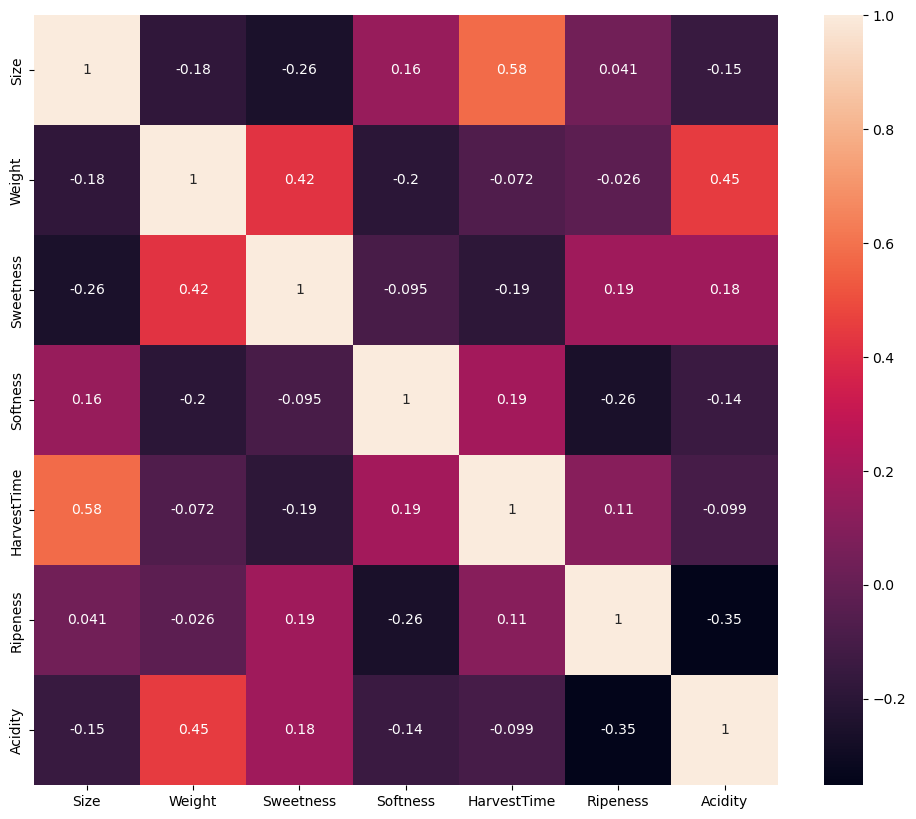

In [22]:
plt.figure(figsize=(12,10))
sns.heatmap(X_train.corr(), annot=True)

In [23]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [24]:
corr_features=correlation(X_train,0.85)

In [25]:
corr_features

set()

In [26]:
# Standardisation process --> Standard Scaler
from sklearn.preprocessing import StandardScaler

In [27]:
# creating object called scaler for the particular function
scaler=StandardScaler()

In [28]:
X_train_scaled=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [29]:
# all Classification
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [30]:
import warnings
warnings.filterwarnings("ignore")

In [31]:
lr=LogisticRegression()
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
knc=KNeighborsClassifier()
svc=SVC()
abc = AdaBoostClassifier()
gbc = GradientBoostingClassifier()

In [32]:
algos = [lr, dtc, rfc, knc,svc, abc, gbc]

names = ["Logistics Regression" , "Decision Tree Classifier" , "Random Forest Classifier" , "K Neighbors Classifier" , "Ada Boost Classifier", "Gradient Boosting Classifier", "Support Vector Classifier"]

for i,j in zip(algos,names):
  i.fit(X_train,y_train)
  y_pred = i.predict(X_test)
  print(j)
  print("accuracy_score is {}".format(accuracy_score(y_test,y_pred) * 100))
  print("   " * 40)
  print("===" * 40)
 

Logistics Regression
accuracy_score is 69.75
                                                                                                                        
Decision Tree Classifier
accuracy_score is 86.8125
                                                                                                                        
Random Forest Classifier
accuracy_score is 92.8125
                                                                                                                        
K Neighbors Classifier
accuracy_score is 90.4375
                                                                                                                        
Ada Boost Classifier
accuracy_score is 91.6875
                                                                                                                        
Gradient Boosting Classifier
accuracy_score is 81.8125
                                                                                                 

In [34]:
from sklearn.model_selection import GridSearchCV

In [35]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [37]:
import warnings
warnings.filterwarnings("ignore")
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [38]:
print("Best parameters found: ", grid_search.best_params_)

Best parameters found:  {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}


In [39]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.81      0.88       788
           1       0.84      0.97      0.90       812

    accuracy                           0.89      1600
   macro avg       0.90      0.89      0.89      1600
weighted avg       0.90      0.89      0.89      1600

[[640 148]
 [ 28 784]]
